# 1. Packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import lightgbm as lgb
import numpy as np
import seaborn as sns
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 2.Data

In [3]:
df = pd.read_csv("bank-additional-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
y= (df['y'] == 'yes')*1
df.drop('y', axis=1, inplace = True)

In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [8]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1          93.994

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

# 3. EDA

<AxesSubplot:xlabel='age', ylabel='Density'>

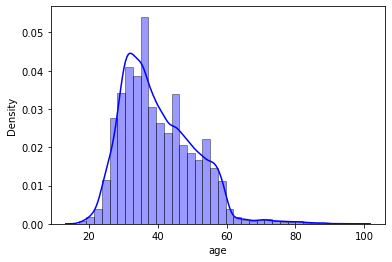

In [12]:
sns.distplot(df['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='duration', ylabel='count'>

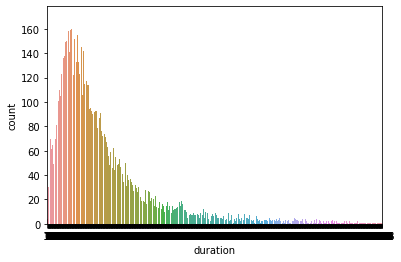

In [13]:
sns.countplot(x='duration',data=df)

<AxesSubplot:xlabel='cons.price.idx', ylabel='count'>

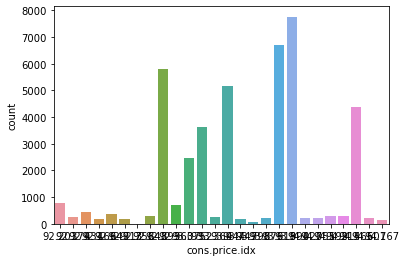

In [14]:
sns.countplot(x='cons.price.idx',data=df)

<AxesSubplot:xlabel='emp.var.rate', ylabel='count'>

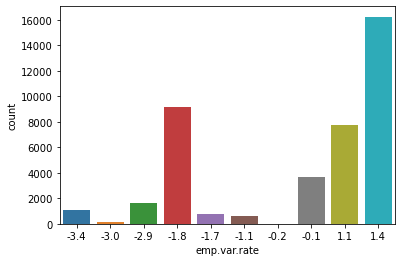

In [15]:
sns.countplot(x='emp.var.rate',data=df)

<AxesSubplot:xlabel='count', ylabel='cons.conf.idx'>

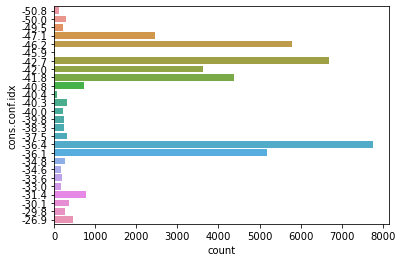

In [16]:
sns.countplot(y='cons.conf.idx',data=df)

<AxesSubplot:xlabel='euribor3m', ylabel='count'>

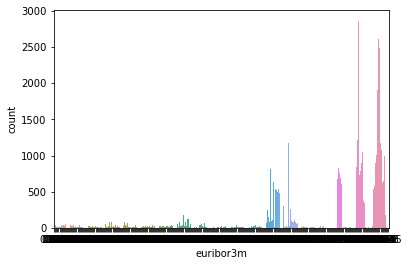

In [17]:
sns.countplot(x='euribor3m',data=df)

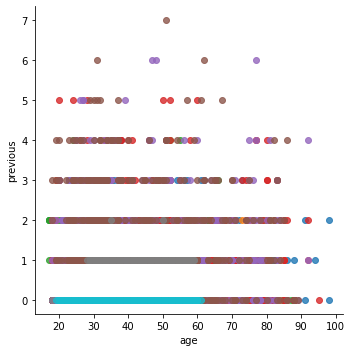

In [18]:
sns.lmplot( x="age", y="previous", data=df, fit_reg=False, hue='emp.var.rate', legend=False)

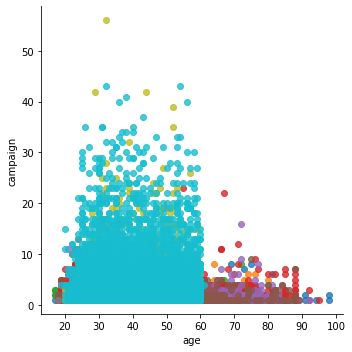

In [19]:
sns.lmplot( x="age", y="campaign", data=df, fit_reg=False, hue='emp.var.rate', legend=False)

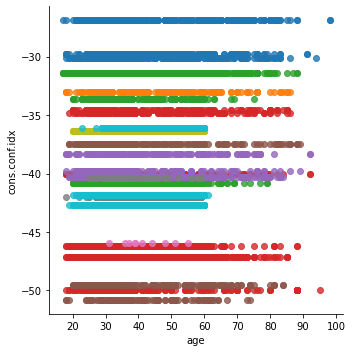

In [20]:
sns.lmplot( x="age", y="cons.conf.idx", data=df, fit_reg=False, hue='emp.var.rate', legend=False)

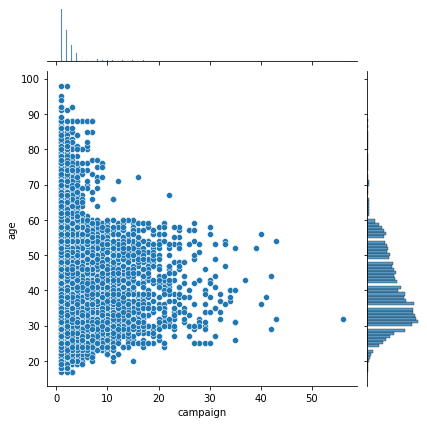

In [21]:
sns.jointplot(x='campaign',y='age',data=df)

<AxesSubplot:xlabel='age', ylabel='campaign'>

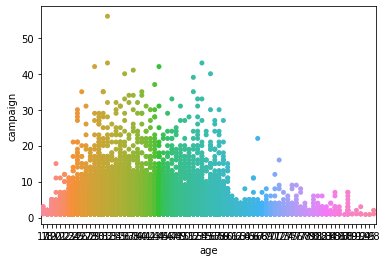

In [22]:
sns.stripplot(y='campaign',x='age',data=df,jitter=False)

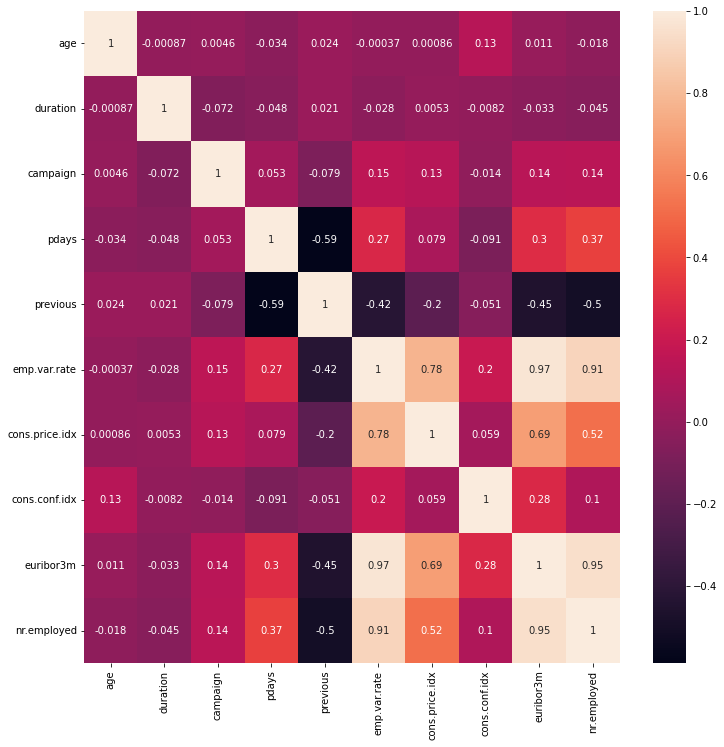

In [23]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# 4. Categorical ----> Numerical


In [24]:
from sklearn.preprocessing import LabelEncoder

categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome']

for i in categorical_column:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [25]:
df.drop('duration', inplace = True, axis=1)

# 5. Split and Create Datasets for LightGBM

In [26]:

df_train, df_test, y_train, y_test = train_test_split(df, y, train_size = 0.7, test_size = 0.3)

In [27]:
lgb_train = lgb.Dataset(data=df_train, label=y_train,  free_raw_data=False)

In [28]:
# Categorical index
categorical_index = [1,2,3,4,5,6,7,8,9,13]
print('Categorical parametres: ' + str(df_train.columns[categorical_index].values))

Categorical parametres: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


# 6. Determine training parametres

In [29]:
#Creat Evaluation Dataset 
lgb_eval = lgb.Dataset(data=df_test, label=y_test, reference=lgb_train,  free_raw_data=False)

# Determinate training parametres
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1
}

# 7. Training Model

In [30]:

evals_result={}
gbm = lgb.train(params,
                lgb_train,
                valid_sets = lgb_eval,
                categorical_feature = categorical_index,
                num_boost_round= 150,
                early_stopping_rounds= 25,
                evals_result=evals_result)


[1]	valid_0's auc: 0.782927
Training until validation scores don't improve for 25 rounds
[2]	valid_0's auc: 0.783371
[3]	valid_0's auc: 0.784133
[4]	valid_0's auc: 0.784365
[5]	valid_0's auc: 0.786945
[6]	valid_0's auc: 0.788887
[7]	valid_0's auc: 0.788915
[8]	valid_0's auc: 0.79025
[9]	valid_0's auc: 0.790356
[10]	valid_0's auc: 0.790934
[11]	valid_0's auc: 0.790495
[12]	valid_0's auc: 0.79059
[13]	valid_0's auc: 0.790653
[14]	valid_0's auc: 0.792542
[15]	valid_0's auc: 0.792079
[16]	valid_0's auc: 0.792212
[17]	valid_0's auc: 0.792122
[18]	valid_0's auc: 0.791922
[19]	valid_0's auc: 0.794279
[20]	valid_0's auc: 0.79444
[21]	valid_0's auc: 0.79499
[22]	valid_0's auc: 0.795657
[23]	valid_0's auc: 0.796183
[24]	valid_0's auc: 0.796327
[25]	valid_0's auc: 0.796659
[26]	valid_0's auc: 0.796595
[27]	valid_0's auc: 0.796507
[28]	valid_0's auc: 0.796724
[29]	valid_0's auc: 0.796591
[30]	valid_0's auc: 0.796579
[31]	valid_0's auc: 0.796448
[32]	valid_0's auc: 0.795631
[33]	valid_0's auc: 0.79

# 8. Prediction and Evaluation


In [31]:
y_pred = gbm.predict(df_test, num_iteration=gbm.best_iteration)

print('The Best iteration: ', gbm.best_iteration)
print('roc_auc_score:', roc_auc_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, ( y_pred>= 0.5)*1))

The Best iteration:  28
roc_auc_score: 0.7967242249440774
accuracy_score: 0.8990855385611395


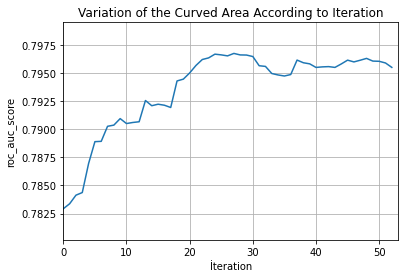

In [32]:
ax = lgb.plot_metric(evals_result, metric='auc')
ax.set_title('Variation of the Curved Area According to Iteration')
ax.set_xlabel('İteration')
ax.set_ylabel('roc_auc_score')
ax.legend_.remove()

Text(0, 0.5, 'Parametres')

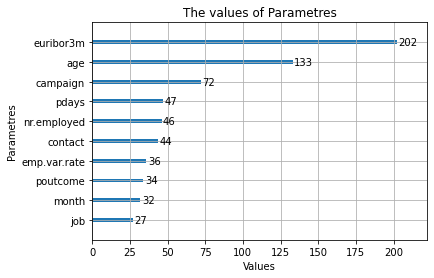

In [33]:
ax = lgb.plot_importance(gbm, max_num_features=10)
ax.set_title('The values of Parametres')
ax.set_xlabel('Values')
ax.set_ylabel('Parametres')